In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [2]:
data = pd.read_csv(r"C:\Users\Alex Marco\Downloads\Projects\Customer Segmentation\Data\Processed\cluster_customers.csv")
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0       1   19                  15                      39   
1       1   21                  15                      81   
2       0   20                  16                       6   
3       0   23                  16                      77   
4       0   31                  17                      40   

   Spending_Efficiency  Income_Spend_Interaction  Cluster      Cluster_Label  \
0             2.600000                       585        2  Moderate Spenders   
1             5.400000                      1215        2  Moderate Spenders   
2             0.375000                        96        2  Moderate Spenders   
3             4.812500                      1232        2  Moderate Spenders   
4             2.352941                       680        2  Moderate Spenders   

          pca1       pca2  
0 -2462.026952 -31.552992  
1 -1831.716832 -56.947290  
2 -2951.267360 -10.462098  
3 -1814.746736 -53.433635  
4 -236

We Compute our X and y

In [3]:
# Fatures to keep
features = [
    'Gender',
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)',
    'Spending_Efficiency',
    'Income_Spend_Interaction'
]

X = data[features]
y = data['Cluster']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

We Train Our Model with different Model ro find the best model that we can use

Logistic Regression

In [5]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)



c:\Users\Alex Marco\Downloads\Projects\Customer Segmentation\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


Xgboost Regressor

In [7]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


c:\Users\Alex Marco\Downloads\Projects\Customer Segmentation\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:07:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluation

In [8]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")
    
evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, rf_pred, "Random Forest")    
evaluate_model(y_test, xgb_pred, "XGBoost Classifier")


--- Logistic Regression Evaluation ---
Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.67      1.00      0.80         2
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.93        40
   macro avg       0.70      0.78      0.73        40
weighted avg       0.92      0.93      0.92        40

Confusion Matrix:
 [[18  0  2  0  0]
 [ 0  2  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  5  0]
 [ 0  1  0  0  0]]


--- Random Forest Evaluation ---
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00        12
           3       1.00      1

c:\Users\Alex Marco\Downloads\Projects\Customer Segmentation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alex Marco\Downloads\Projects\Customer Segmentation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alex Marco\Downloads\Projects\Customer Segmentation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00        12
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         1

    accuracy                           0.95        40
   macro avg       0.95      0.86      0.89        40
weighted avg       0.95      0.95      0.95        40

Confusion Matrix:
 [[20  0  0  0  0]
 [ 0  1  0  1  0]
 [ 0  0 12  0  0]
 [ 1  0  0  4  0]
 [ 0  0  0  0  1]]




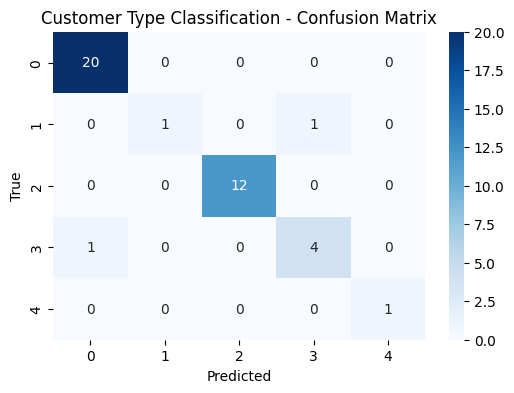

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Customer Type Classification - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Save Use Model <br>
in our case is Random Forest performs well and have high accuracy scores

In [10]:
# Save the best model
joblib.dump(rf, '../Model/random_forest_model.pkl')
print("Classifier model saved successfully")

Classifier model saved successfully


In [14]:
joblib.dump(features, '../Model/features.pkl')


['../Model/features.pkl']